Nome: Alessandro Melo de Oliveira

NºUSP: 10788662

# EXERCÍCIO III

In [264]:
import sympy as sp
from sympy import pi

In [265]:
m,n = sp.symbols('m n')

[0/45/90/0/45/90]

In [266]:
h = 0.3/1000 # [mm]

In [267]:
h0 = -3*h
h1 = -2*h
h2 = -h
h3 = 0
h4 = h
h5 = 2*h
h6 = 3*h

In [268]:
# Mpa
E11 = 155000*1e6 
E22 = 12100*1e6
v12 = 0.35
G12 = 4400*1e6 

N = sp.Matrix([1000*100,0,0]) # [N/mm]

In [269]:
Q11_value = (E11**2)/(E11-v12**2 * E22)
Q21_value =  (v12*E11*E22)/(E11-v12**2 * E22)
Q22_value = (E11*E22)/(E11-v12**2 * E22)
Q66_value = G12

In [270]:
Q = sp.zeros(3,3)

In [271]:
Q[0,0] = Q11_value
Q[0,1] = Q21_value
Q[0,2] = 0
Q[1,0] = Q21_value
Q[1,1] = Q22_value
Q[1,2] = 0
Q[2,0] = 0
Q[2,1] = 0
Q[2,2] = Q66_value

In [272]:
Q/1e9

Matrix([
[156.496561472533, 4.27588992152373,   0],
[4.27588992152373, 12.2168283472107,   0],
[               0,                0, 4.4]])

In [273]:
Q11, Q12, Q16, Q22, Q26, Q16, Q66 = sp.symbols('Q11 Q12 Q16 Q22 Q26 Q16 Q66')

In [274]:
Q_barra = sp.zeros(3,3)

In [275]:
Q_barra[0,0] =  Q11*m**4 + 2*m**2 * n**2 * (Q12 + 2*Q66) + Q22*n**4
Q_barra[0,1] = (Q11 + Q22 - 4*Q66)*n**2 * m**2 + Q12*(n**4 + m**4)
Q_barra[0,2] = (Q11 - Q12)*n*(m**3) + (Q12 - Q22)*(n**3)*m - 2*m*n*(m**2 - n**2)*Q66
Q_barra[1,0] = (Q11 + Q22 - 4*Q66)*n**2 * m**2 + Q12*(n**4 + m**4)
Q_barra[1,1] = Q11*n**4 + 2*(Q12 + 2*Q66)*n**2 * m**2 + Q22*m**4
Q_barra[1,2] = (Q11 - Q12)*n**3*m + (Q12 - Q22)*n*m**3 + 2*m*n*(m**2 - n**2)*Q66
Q_barra[2,0] = (Q11 - Q12)*n*m**3 + (Q12 - Q22)*n**3*m - 2*m*n*(m**2 - n**2)*Q66
Q_barra[2,1] = (Q11 - Q12)*(n**3)*m + (Q12 - Q22)*n*(m**3) + 2*m*n*(m**2 - n**2)*Q66
Q_barra[2,2] = (Q11 + Q22 - 2*Q12 - 2*Q66)*n**2 * m**2 + Q66*(n**4 + m**4)

In [276]:
# Lâminas com theta = 0
Q_barra_0 = Q_barra.subs({
    m:sp.cos(0),
    n:sp.sin(0)
})

Q_barra_0 = Q_barra_0.subs({
    Q11 :Q11_value,
    Q12 : Q21_value,
    Q66 : Q66_value,
    Q22 : Q22_value
})

In [277]:
Q_barra_0/1e9

Matrix([
[156.496561472533, 4.27588992152373,   0],
[4.27588992152373, 12.2168283472107,   0],
[               0,                0, 4.4]])

In [278]:
# Lâminas com theta = pi/4
Q_barra_45 = Q_barra.subs({
    m:sp.cos(pi/4),
    n:sp.sin(pi/4)
})

Q_barra_45 = Q_barra_45.subs({
    Q11 :Q11_value,
    Q12 : Q21_value,
    Q66 : Q66_value,
    Q22 : Q22_value
})

In [279]:
Q_barra_45/1e9

Matrix([
[48.7162924156979, 39.9162924156979, 36.0699332813307],
[39.9162924156979, 48.7162924156979, 36.0699332813307],
[36.0699332813307, 36.0699332813307, 40.0404024941741]])

In [280]:
# Lâminas com theta = pi/2
Q_barra_90 = Q_barra.subs({
    m:sp.cos(pi/2),
    n:sp.sin(pi/2)
})

Q_barra_90 = Q_barra_90.subs({
    Q11 :Q11_value,
    Q12 : Q21_value,
    Q66 : Q66_value,
    Q22 : Q22_value
})

In [281]:
Q_barra_90/1e9

Matrix([
[12.2168283472107, 4.27588992152373,   0],
[4.27588992152373, 156.496561472533,   0],
[               0,                0, 4.4]])

In [282]:
Q0 = Q_barra_0
Q45 = Q_barra_45
Q90 = Q_barra_90

In [283]:
A = sp.zeros(3)
B = sp.zeros(3)
D = sp.zeros(3)

In [284]:
A = Q0*(h1-h0) + Q45*(h2-h1) + Q90*(h3-h2) + Q0*(h4-h3) + Q45*(h5-h4) + Q90*(h6-h5)
A/1e6

Matrix([
[130.457809341265, 29.0808433552472, 21.6419599687984],
[29.0808433552472, 130.457809341265, 21.6419599687984],
[21.6419599687984, 21.6419599687984, 29.3042414965045]])

In [285]:
B = (Q0*(h1**2-h0**2) + Q45*(h2**2-h1**2) + Q90*(h3**2-h2**2) + Q0*(h4**2-h3**2) + Q45*(h5**2-h4**2) + Q90*(h6**2-h5**2) )/2
B[0,1] = 0
B[1,0] = 0
B[2,2] = 0

B/1e3

Matrix([
[-25.9703519625581,                0, 0],
[                0, 25.9703519625581, 0],
[                0,                0, 0]])

In [286]:
D = (Q0*(h1**3-h0**3) + Q45*(h2**3-h1**3) + Q90*(h3**3-h2**3) + Q0*(h4**3-h3**3) + Q45*(h5**3-h4**3) + Q90*(h6**3-h5**3))/3
D

Matrix([
[36.5066630119318, 6.56877321612647, 4.54481159344766],
[6.56877321612647, 36.5066630119318, 4.54481159344766],
[4.54481159344766, 4.54481159344766, 6.62909071426594]])

In [287]:
A_ast= A.inv()
B_ast= -A.inv() * B
C_ast= -B_ast.T
D_ast= D - B*A.inv()*B

In [288]:
A_linha = A_ast + (B_ast)*(D_ast.inv())*B_ast.T
B_linha = (B_ast)*(D_ast.inv())
C_linha = B_linha
D_linha = D_ast.inv()

In [289]:
D_linha/1e-3

Matrix([
[  36.844513977957, -3.72177017626731, -22.7084884677711],
[-3.72177017626731,   36.844513977957,  -22.708488467771],
[-22.7084884677711,  -22.708488467771,  181.987493506428]])

In [290]:
D_ast

Matrix([
[30.5367333858702, 5.88572033773862, 4.54481159344766],
[5.88572033773862, 30.5367333858702, 4.54481159344766],
[4.54481159344766, 4.54481159344766, 6.62909071426594]])

In [291]:
episilon0 = A_linha*N
K = C_linha*N

sigma_0 = Q0*episilon0
sigma_45 = Q45*episilon0
sigma_90 = Q90*episilon0

In [292]:
episilon0/1e-3

Matrix([
[  1.07788693952142],
[-0.125902326750681],
[-0.703065898598808]])

In [293]:
K

Matrix([
[  0.837173828204957],
[-0.0113515800363613],
[ -0.609891644468592]])

In [294]:
T = sp.zeros(3)
T[0,0] = m**2 
T[0,1] = n**2
T[0,2] = 2*m*n
T[1,0] = n**2
T[1,1] = m**2
T[1,2] = -2*m*n
T[2,0] = -m*n
T[2,1] = m*n
T[2,2] = (m**2 - n**2)

In [295]:
T_45 = T.subs({
    m:sp.cos(pi/4),
    n:sp.sin(pi/4)
})

T_0 = T.subs({
    m:sp.cos(0),
    n:sp.sin(0)
})

T_90 = T.subs({
    m:sp.cos(pi/2),
    n:sp.sin(pi/2)
})

In [296]:
T_90

Matrix([
[0, 1,  0],
[1, 0,  0],
[0, 0, -1]])

In [297]:
episilon_0_local = T_0*episilon0
episilon_45_local = T_45*episilon0
episilon_90_local = T_90*episilon0

sigma_0_local = T_0*sigma_0
sigma_45_local = T_45*sigma_45
sigma_90_local = T_90*sigma_90

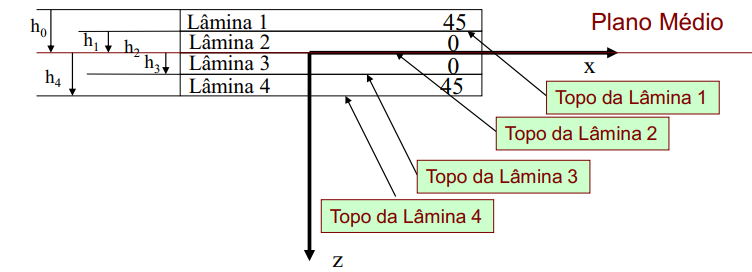

### Tensão e deformação em cada lâmina no sistema global e local

In [298]:
def tensao_deformacao(Q_barra_X, z, T):
    
    dict_tensao_deformacao_local = {"sigma":{"botton":[], "mid":[], "top":[]}, "epsilon":{"botton":[], "mid":[], "top":[]}}
    dict_tensao_deformacao_global = {"sigma":{"botton":[], "mid":[], "top":[]}, "epsilon":{"botton":[], "mid":[], "top":[]}}
    
    #Q_barra é o Q_barra correspondente de cada lâmina
    #z é a altura da base de cada lâmina, para a lâmina I da figura acima, z = -2*h

    z_botton = z
    z_mid = z + h/2
    z_top = z + h
    
    sigma_global_botton = Q_barra_X*(episilon0 + z_botton*K)
    sigma_local_botton = T*sigma_global_botton
    epsilon_global_botton = episilon0 + z_botton*K
    epsilon_local_botton = T*epsilon_global_botton

    sigma_global_mid = Q_barra_X*(episilon0 + z_mid*K)
    sigma_local_mid = T*sigma_global_mid
    epsilon_global_mid = episilon0 + z_mid*K
    epsilon_local_mid = T*epsilon_global_mid

    
    sigma_global_top = Q_barra_X*(episilon0 + z_top*K)
    sigma_local_top = T*sigma_global_top
    epsilon_global_top = episilon0 + z_top*K
    epsilon_local_top = T*epsilon_global_top
    
    
    dict_tensao_deformacao_global['sigma']['botton'] = sigma_global_botton/1e6
    dict_tensao_deformacao_global['sigma']['mid'] = sigma_global_mid/1e6
    dict_tensao_deformacao_global['sigma']['top'] = sigma_global_top/1e6
    dict_tensao_deformacao_global['epsilon']['botton'] =epsilon_global_botton
    dict_tensao_deformacao_global['epsilon']['mid'] = epsilon_global_mid
    dict_tensao_deformacao_global['epsilon']['top'] = epsilon_global_top
    

    dict_tensao_deformacao_local['sigma']['botton'] = sigma_local_botton/1e6
    dict_tensao_deformacao_local['sigma']['mid'] = sigma_local_mid/1e6
    dict_tensao_deformacao_local['sigma']['top'] = sigma_local_top/1e6
    dict_tensao_deformacao_local['epsilon']['botton'] =epsilon_local_botton
    dict_tensao_deformacao_local['epsilon']['mid'] = epsilon_local_mid
    dict_tensao_deformacao_local['epsilon']['top'] = epsilon_local_top
    

    #Printando tensões em [MPa] e deformações em [mm]
    print("BOTTON")
    print("SIGMA_GLOBAL: {}".format(sigma_global_botton/1e6))
    print("EPSILON_GLOBAL: {}".format(1000*epsilon_global_botton))
    print("SIGMA_LOCAL: {}".format(sigma_local_botton/1e6))
    print("EPSILON_LOCAL: {}".format(1000*epsilon_local_botton))

    print("----------------------------------------------------")
    print("MID")
    print("SIGMA_GLOBAL: {}".format(sigma_global_mid/1e6))
    print("EPSILON_GLOBAL: {}".format(1000*epsilon_global_mid))
    print("SIGMA_LOCAL: {}".format(sigma_local_mid/1e6))
    print("EPSILON_LOCAL: {}".format(1000*epsilon_local_mid))
    print("----------------------------------------------------")
    print("TOP")
    print("SIGMA_GLOBAL: {}".format(sigma_global_top/1e6))
    print("EPSILON_GLOBAL: {}".format(1000*epsilon_global_top))
    print("SIGMA_LOCAL: {}".format(sigma_local_top/1e6))
    print("EPSILON_LOCAL: {}".format(1000*epsilon_local_top))
    print("----------------------------------------------------")
    
    #Retornando tensões em [MPa] e deformacoes em [m]
    #return sigma_local_botton/1e6, epsilon_local_botton, sigma_local_mid/1e6, epsilon_local_mid, sigma_local_top/1e6, epsilon_local_top
    return dict_tensao_deformacao_local

In [299]:
#Lâmina 1, z = -3*h, Q_barra_0

lamina1_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_0, z = -3*h, T = T_0)

BOTTON
SIGMA_GLOBAL: Matrix([[50.2775965752231], [-0.0260857600158502], [-0.678319041739131]])
EPSILON_GLOBAL: Matrix([[0.324430494136959], [-0.115685904717956], [-0.154163418577075]])
SIGMA_LOCAL: Matrix([[50.2775965752231], [-0.0260857600158502], [-0.678319041739131]])
EPSILON_LOCAL: Matrix([[0.324430494136959], [-0.115685904717956], [-0.154163418577075]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[69.9225396795534], [0.490061664455825], [-1.08084752708840]])
EPSILON_GLOBAL: Matrix([[0.450006568367702], [-0.117388641723410], [-0.245647165247364]])
SIGMA_LOCAL: Matrix([[69.9225396795534], [0.490061664455825], [-1.08084752708840]])
EPSILON_LOCAL: Matrix([[0.450006568367702], [-0.117388641723410], [-0.245647165247364]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[89.5674827838837], [1.00620908892750], [-1.48337601243767]])
EPSILON_GLOBAL: Matrix([[0.575582642598446], [-0.119091378728864], [-0.337130911917653]])
SIG

In [300]:
#Lâmina 2, z = -2*h, Q_barra_45
lamina2_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_45, z = -2*h, T = T_45)

BOTTON
SIGMA_GLOBAL: Matrix([[11.1262765287521], [5.01314514107181], [2.96675202487534]])
EPSILON_GLOBAL: Matrix([[0.575582642598446], [-0.119091378728864], [-0.337130911917653]])
SIGMA_LOCAL: Matrix([[11.0364628597873], [5.10295881003664], [-3.05656569384016]])
EPSILON_LOCAL: Matrix([[-0.108885279982862], [0.565376543852444], [-0.347337010663655]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[13.8760976944522], [6.64291276789335], [3.77180899557389]])
EPSILON_GLOBAL: Matrix([[0.701158716829190], [-0.120794115734319], [-0.428614658587941]])
SIGMA_LOCAL: Matrix([[14.0313142267467], [6.48769623559890], [-3.61659246327944]])
EPSILON_LOCAL: Matrix([[-0.138432358040506], [0.718796959135377], [-0.410976416281754]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[16.6259188601523], [8.27268039471488], [4.57686596627242]])
EPSILON_GLOBAL: Matrix([[0.826734791059933], [-0.122496852739773], [-0.520098405258230]])
SIGMA_LOCAL: Mat

In [301]:
#Lâmina 3, z = -*h, Q_barra_90
lamina3_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_90, z = -h, T = T_90)

BOTTON
SIGMA_GLOBAL: Matrix([[9.57629397299791], [-15.6353092841155], [-2.28843298313621]])
EPSILON_GLOBAL: Matrix([[0.826734791059933], [-0.122496852739773], [-0.520098405258230]])
SIGMA_LOCAL: Matrix([[-15.6353092841155], [9.57629397299791], [2.28843298313621]])
EPSILON_LOCAL: Matrix([[-0.122496852739773], [0.826734791059933], [0.520098405258230]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[11.1031546003909], [-15.3648323003734], [-2.69096146848548]])
EPSILON_GLOBAL: Matrix([[0.952310865290677], [-0.124199589745227], [-0.611582151928519]])
SIGMA_LOCAL: Matrix([[-15.3648323003734], [11.1031546003909], [2.69096146848548]])
EPSILON_LOCAL: Matrix([[-0.124199589745227], [0.952310865290677], [0.611582151928519]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[12.6300152277838], [-15.0943553166312], [-3.09348995383475]])
EPSILON_GLOBAL: Matrix([[1.07788693952142], [-0.125902326750681], [-0.703065898598808]])
SIGMA_LOCAL: 

In [302]:
#Lâmina 4, z = 0, Q_barra_0
lamina4_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_0, z = 0, T = T_0)

BOTTON
SIGMA_GLOBAL: Matrix([[168.147255201205], [3.07079878681420], [-3.09348995383475]])
EPSILON_GLOBAL: Matrix([[1.07788693952142], [-0.125902326750681], [-0.703065898598808]])
SIGMA_LOCAL: Matrix([[168.147255201205], [3.07079878681420], [-3.09348995383475]])
EPSILON_LOCAL: Matrix([[1.07788693952142], [-0.125902326750681], [-0.703065898598808]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[187.792198305535], [3.58694621128588], [-3.49601843918402]])
EPSILON_GLOBAL: Matrix([[1.20346301375216], [-0.127605063756135], [-0.794549645269096]])
SIGMA_LOCAL: Matrix([[187.792198305535], [3.58694621128588], [-3.49601843918402]])
EPSILON_LOCAL: Matrix([[1.20346301375216], [-0.127605063756135], [-0.794549645269096]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[207.437141409866], [4.10309363575755], [-3.89854692453329]])
EPSILON_GLOBAL: Matrix([[1.32903908798291], [-0.129307800761590], [-0.886033391939385]])
SIGMA_LOCAL: Matri

In [303]:
#Lâmina 5, z = 45, Q_barra_45
lamina5_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_45, z = h, T = T_45)

BOTTON
SIGMA_GLOBAL: Matrix([[27.6252035229526], [14.7917509020010], [7.79709384906659]])
EPSILON_GLOBAL: Matrix([[1.32903908798291], [-0.129307800761590], [-0.886033391939385]])
SIGMA_LOCAL: Matrix([[29.0055710615434], [13.4113833634102], [-6.41672631047579]])
EPSILON_LOCAL: Matrix([[-0.286167748328726], [1.48589903555004], [-0.729173444372249]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[30.3750246886527], [16.4215185288226], [8.60215081976511]])
EPSILON_GLOBAL: Matrix([[1.45461516221365], [-0.131010537767044], [-0.977517138609674]])
SIGMA_LOCAL: Matrix([[32.0004224285027], [14.7961207889725], [-6.97675307991506]])
EPSILON_LOCAL: Matrix([[-0.315714826386370], [1.63931945083298], [-0.792812849990348]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[33.1248458543528], [18.0512861556441], [9.40720779046366]])
EPSILON_GLOBAL: Matrix([[1.58019123644440], [-0.132713274772498], [-1.06900088527996]])
SIGMA_LOCAL: Matrix([[

In [304]:
#Lâmina 6, z = 90, Q_barra_90
lamina6_sigma_epsilon = tensao_deformacao(Q_barra_X = Q_barra_90, z = 2*h, T = T_90)

BOTTON
SIGMA_GLOBAL: Matrix([[18.7374577373556], [-14.0124473816627], [-4.70360389523184]])
EPSILON_GLOBAL: Matrix([[1.58019123644440], [-0.132713274772498], [-1.06900088527996]])
SIGMA_LOCAL: Matrix([[-14.0124473816627], [18.7374577373556], [4.70360389523184]])
EPSILON_LOCAL: Matrix([[-0.132713274772498], [1.58019123644440], [1.06900088527996]])
----------------------------------------------------
MID
SIGMA_GLOBAL: Matrix([[20.2643183647486], [-13.7419703979206], [-5.10613238058111]])
EPSILON_GLOBAL: Matrix([[1.70576731067514], [-0.134416011777952], [-1.16048463195025]])
SIGMA_LOCAL: Matrix([[-13.7419703979206], [20.2643183647486], [5.10613238058111]])
EPSILON_LOCAL: Matrix([[-0.134416011777952], [1.70576731067514], [1.16048463195025]])
----------------------------------------------------
TOP
SIGMA_GLOBAL: Matrix([[21.7911789921415], [-13.4714934141784], [-5.50866086593038]])
EPSILON_GLOBAL: Matrix([[1.83134338490588], [-0.136118748783406], [-1.25196837862054]])
SIGMA_LOCAL: Matrix([[

In [305]:
lamina5_sigma_epsilon

{'sigma': {'botton': Matrix([
  [ 29.0055710615434],
  [ 13.4113833634102],
  [-6.41672631047579]]),
  'mid': Matrix([
  [ 32.0004224285027],
  [ 14.7961207889725],
  [-6.97675307991506]]),
  'top': Matrix([
  [ 34.9952737954621],
  [ 16.1808582145348],
  [-7.53677984935433]])},
 'epsilon': {'botton': Matrix([
  [-0.000286167748328726],
  [  0.00148589903555004],
  [-0.000729173444372249]]),
  'mid': Matrix([
  [ -0.00031571482638637],
  [  0.00163931945083298],
  [-0.000792812849990348]]),
  'top': Matrix([
  [-0.000345261904444014],
  [  0.00179273986611591],
  [-0.000856452255608447]])}}

### c) Critérios de falha

In [306]:
class criterios:
        
    def __init__(self, lamina_sigma_epsilon):
        
        self.dict_margens = {"botton" : {"max_tensao": {}, "max_deformacao": {}, "tsai_wu": {}, "tsai_hill":{}},
                "mid":{"max_tensao": {}, "max_deformacao": {}, "tsai_wu": {}, "tsai_hill":{}},
                "top":{"max_tensao": {}, "max_deformacao": {}, "tsai_wu": {}, "tsai_hill":{}}}
               
        self.lamina = lamina_sigma_epsilon
        
        #[MPa]
        self.XT = 250
        self.YT = 40
        self.XC = -180
        self.YC = -45
        self.S12 = 47

        #[m]
        self.XT_linha = 0.020
        self.YT_linha = 0.007
        self.XC_linha = -0.018
        self.YC_linha = -0.012
        self.S12_linha = 0.010
        
    def max_tensao(self, lamina):
        
        sigma_1 = lamina[0] 
        sigma_2 = lamina[1]
        sigma_12 = lamina[2]
        
        if sigma_1 > 0:
            MS_1 = self.XT/sigma_1 - 1
        else:
            MS_1 = self.XC/sigma_1 - 1 
            
        if sigma_2 > 0:
            MS_2 = self.YT/sigma_2 - 1
        else:
            MS_2 = self.YC/sigma_2 - 1
            
        MS_12 = self.S12/abs(sigma_12) - 1
        
        return sp.Matrix([MS_1,MS_2,MS_12])
            
    def max_deformacao(self, lamina):
        
        epsilon_1 = lamina[0] 
        epsilon_2 = lamina[1]
        epsilon_12 = lamina[2]
                
        if epsilon_1 > 0:
            MS_1 = self.XT_linha/epsilon_1 - 1
        else:
            MS_1 = self.XC_linha/epsilon_1 - 1 
            
        if epsilon_2 > 0:
            MS_2 = self.YT_linha/epsilon_2 - 1
        else:
            MS_2 = self.YC_linha/epsilon_2 - 1
            
        MS_12 = self.S12_linha/abs(epsilon_12) - 1
        
        return sp.Matrix([MS_1,MS_2,MS_12])
        
    def tsai_wu(self, lamina):
        
        sigma_1 = lamina[0] 
        sigma_2 = lamina[1]
        sigma_12 = lamina[2]
        
        
        F1 = 1/self.XT + 1/self.XC
        F11 = -1/(self.XT*self.XC)
        F2 = 1/self.YT + 1/self.YC
        F22 = -1/(self.YT*self.YC)
        F66 = (1/self.S12)**2
        F12 = -0.5*(F11*F22)**.5
        
        A = F11*sigma_1**2 + F22*sigma_2**2 + F66*sigma_12**2 + 2 *F12*sigma_1*sigma_2
        B = F1*sigma_1 + F2*sigma_2
        
        Sf_menos = abs((-B - (B**2 + 4*A)**.5)/(2*A))
        Sf_mais = (-B + (B**2 + 4*A)**.5)/(2*A)
        
        MS_menos =  Sf_menos - 1
        MS_mais = Sf_mais - 1
        
        return MS_mais
        
    def tsai_hill(self, lamina):
        
        sigma_1 = lamina[0] 
        sigma_2 = lamina[1]
        sigma_12 = lamina[2]
        
        if sigma_1 >0 and sigma_2 > 0:
            self.f_sigma = (sigma_1**2)/self.XT**2 + (sigma_2**2)/self.YT**2 - (sigma_1*sigma_2)/self.XT**2 + (sigma_12**2)/self.S12**2
        elif sigma_1>0 and sigma_2<0:
            self.f_sigma = (sigma_1**2)/self.XT**2 + (sigma_2**2)/self.YC**2 - (sigma_1*sigma_2)/self.XT**2 + (sigma_12**2)/self.S12**2
        elif sigma_1<0 and sigma_2<0:
            self.f_sigma = (sigma_1**2)/self.XC**2 + (sigma_2**2)/self.YC**2 - (sigma_1*sigma_2)/self.XC**2 + (sigma_12**2)/self.S12**2
        elif sigma_1<0 and sigma_2>0:
            self.f_sigma = (sigma_1**2)/self.XC**2 + (sigma_2**2)/self.YT**2 - (sigma_1*sigma_2)/self.XC**2 + (sigma_12**2)/self.S12**2
        
        self.FS = self.f_sigma**.5
        self.MS = 1/self.FS - 1
        
        return self.MS
    
    def calculo_margens(self):
    
        for posicao in ['botton', 'mid', 'top']:
            
            self.dict_margens[posicao]['max_tensao'] = self.max_tensao(self.lamina['sigma'][posicao])
            self.dict_margens[posicao]['max_deformacao'] = self.max_deformacao(self.lamina['epsilon'][posicao])
            self.dict_margens[posicao]['tsai_wu'] = self.tsai_wu(self.lamina['sigma'][posicao])
            self.dict_margens[posicao]['tsai_hill'] = self.tsai_hill(self.lamina['sigma'][posicao])
            
        return self.dict_margens

In [307]:
ms_lamina1 = criterios(lamina1_sigma_epsilon).calculo_margens()
ms_lamina2 = criterios(lamina2_sigma_epsilon).calculo_margens()
ms_lamina3 = criterios(lamina3_sigma_epsilon).calculo_margens()
ms_lamina4 = criterios(lamina4_sigma_epsilon).calculo_margens()
ms_lamina5 = criterios(lamina5_sigma_epsilon).calculo_margens()
ms_lamina6 = criterios(lamina6_sigma_epsilon).calculo_margens()

In [315]:
# MS para a lâmina 1

for position in ['botton', 'mid', 'top']:
    print("###### Posicao: {} ######".format(position))
    for metodo in ['max_tensao', 'max_deformacao', 'tsai_wu', 'tsai_hill']:
        print("-> Método: {}".format(metodo))
        print("MS: {}".format(ms_lamina1[position][metodo]))

###### Posicao: botton ######
-> Método: max_tensao
MS: Matrix([[3.97239361125708], [1724.07912258095], [68.2889291143847]])
-> Método: max_deformacao
MS: Matrix([[60.6464862626537], [102.729145130136], [63.8662315113389]])
-> Método: tsai_wu
MS: 3.95499448358133
-> Método: tsai_hill
MS: 3.95833904592579
###### Posicao: mid ######
-> Método: max_tensao
MS: Matrix([[2.57538500669055], [80.6223812250584], [42.4843942573557]])
-> Método: max_deformacao
MS: Matrix([[43.4437957262391], [101.224540839941], [39.7087946239075]])
-> Método: tsai_wu
MS: 2.62952345206973
-> Método: tsai_hill
MS: 2.57240213266754
###### Posicao: top ######
-> Método: max_tensao
MS: Matrix([[1.79119153770595], [38.7531690382913], [30.6844816189010]])
-> Método: max_deformacao
MS: Matrix([[33.7473994519897], [99.7629614173871], [28.6620678985456]])
-> Método: tsai_wu
MS: 1.86171354517517
-> Método: tsai_hill
MS: 1.78916146115782
